In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

# S&P500 전처리 후 예측

In [2]:
sp = pd.read_csv("S&P 500 내역_day.csv")

In [3]:
sp = sp.drop(sp.columns[range(2,7)], axis = 1)

In [4]:
sp

,날짜,종가
0,2022년 8월 16일,"4,305.20"
1,2022년 8월 15일,"4,297.14"
2,2022년 8월 12일,"4,280.15"
3,2022년 8월 11일,"4,207.27"
4,2022년 8월 10일,"4,210.24"
...,...,...
3172,2010년 1월 08일,"1,144.98"
3173,2010년 1월 07일,"1,141.69"
3174,2010년 1월 06일,"1,137.14"
3175,2010년 1월 05일,"1,136.52"


In [5]:
sp["종가"]=sp["종가"].str.replace(pat=r',',repl=r'', regex=True)

In [6]:
sp["종가"] = sp["종가"].astype('float64')

In [7]:
sp["날짜"]=sp["날짜"].str.replace(pat=r'월',repl=r'-', regex=True)
sp["날짜"]=sp["날짜"].str.replace(pat=r'년',repl=r'-', regex=True)
sp["날짜"]=sp["날짜"].str.replace(pat=r'일',repl=r'', regex=True)
sp["날짜"]=sp["날짜"].str.replace(pat=r' ',repl=r'', regex=True)

In [8]:
sp

,날짜,종가
0,2022-8-16,4305.20
1,2022-8-15,4297.14
2,2022-8-12,4280.15
3,2022-8-11,4207.27
4,2022-8-10,4210.24
...,...,...
3172,2010-1-08,1144.98
3173,2010-1-07,1141.69
3174,2010-1-06,1137.14
3175,2010-1-05,1136.52


In [9]:
sp['날짜'] = pd.to_datetime(sp['날짜'])

In [10]:
sp = sp.set_index("날짜")

In [11]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3177 entries, 2022-08-16 to 2010-01-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3177 non-null   float64
dtypes: float64(1)
memory usage: 49.6 KB


In [12]:
m = Prophet()

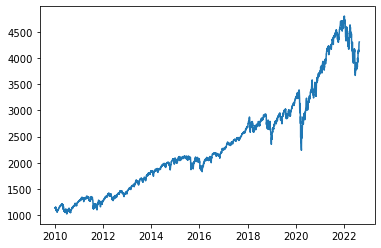

In [13]:
plt.plot(sp)
plt.show()

In [14]:
prophet_series = pd.DataFrame(list(zip(sp.index,sp['종가'])), columns=['ds', 'y'])
m.fit(prophet_series)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


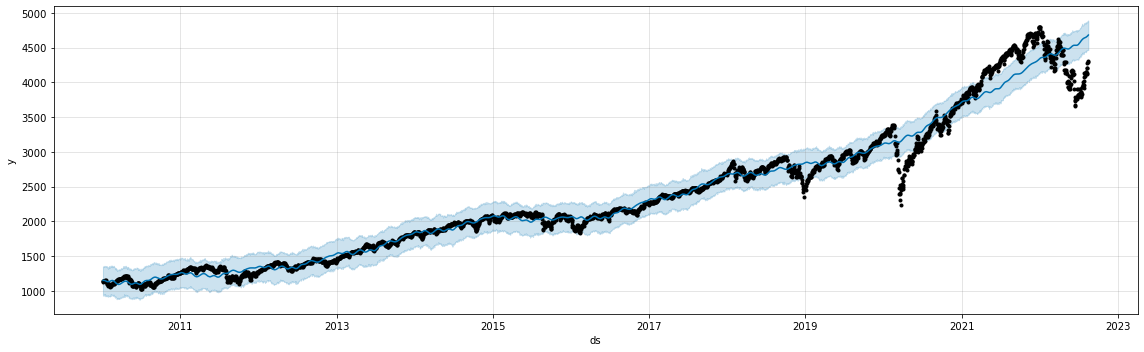

In [15]:
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


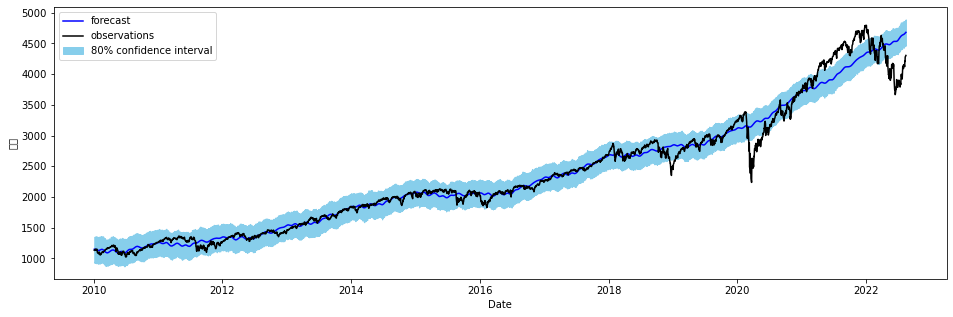

In [16]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),
                forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('종가')
plt.show()

In [17]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3902,2024-08-11
3903,2024-08-12
3904,2024-08-13
3905,2024-08-14


C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


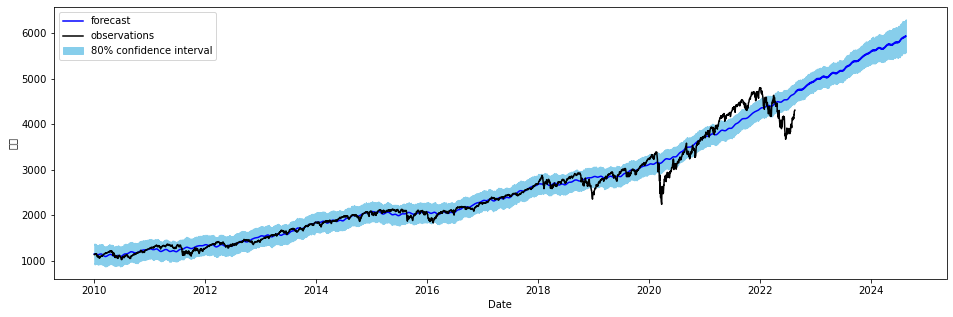

In [18]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('종가')
plt.show()

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,1104.798125,937.459477,1360.168663,1104.798125,1104.798125,43.926397,43.926397,43.926397,-5.066331,-5.066331,-5.066331,48.992727,48.992727,48.992727,0.0,0.0,0.0,1148.724522
1,2010-01-05,1105.101854,948.975633,1376.440125,1105.101854,1105.101854,44.892898,44.892898,44.892898,-4.349854,-4.349854,-4.349854,49.242752,49.242752,49.242752,0.0,0.0,0.0,1149.994752
2,2010-01-06,1105.405583,932.156453,1353.275308,1105.405583,1105.405583,44.648231,44.648231,44.648231,-4.637323,-4.637323,-4.637323,49.285553,49.285553,49.285553,0.0,0.0,0.0,1150.053814
3,2010-01-07,1105.709312,915.519991,1346.344824,1105.709312,1105.709312,44.022818,44.022818,44.022818,-5.090345,-5.090345,-5.090345,49.113163,49.113163,49.113163,0.0,0.0,0.0,1149.732131
4,2010-01-08,1106.013042,939.494325,1354.314118,1106.013042,1106.013042,43.586669,43.586669,43.586669,-5.135272,-5.135272,-5.135272,48.721941,48.721941,48.721941,0.0,0.0,0.0,1149.599710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2024-08-11,5935.708594,5613.646526,6284.161487,5667.366663,6207.554081,0.746526,0.746526,0.746526,12.139561,12.139561,12.139561,-11.393035,-11.393035,-11.393035,0.0,0.0,0.0,5936.455120
3903,2024-08-12,5937.424324,5574.321402,6282.765096,5668.692930,6209.695271,-15.103915,-15.103915,-15.103915,-5.066331,-5.066331,-5.066331,-10.037584,-10.037584,-10.037584,0.0,0.0,0.0,5922.320409
3904,2024-08-13,5939.140054,5571.943006,6252.189273,5670.033543,6211.836460,-12.873677,-12.873677,-12.873677,-4.349854,-4.349854,-4.349854,-8.523823,-8.523823,-8.523823,0.0,0.0,0.0,5926.266377
3905,2024-08-14,5940.855784,5623.781812,6301.187588,5671.392662,6213.977650,-11.504041,-11.504041,-11.504041,-4.637323,-4.637323,-4.637323,-6.866719,-6.866719,-6.866719,0.0,0.0,0.0,5929.351743


In [20]:
SP500 = forecast[['ds','yhat']]

In [21]:
SP500 = SP500[(SP500['ds'].dt.year >= 2022)]

In [22]:
SP500

,ds,yhat
3021,2022-01-03,4347.530461
3022,2022-01-04,4350.407910
3023,2022-01-05,4352.086196
3024,2022-01-06,4353.391705
3025,2022-01-07,4354.890117
...,...,...
3902,2024-08-11,5936.455120
3903,2024-08-12,5922.320409
3904,2024-08-13,5926.266377
3905,2024-08-14,5929.351743


# 다우존스 전처리 후 예측

In [23]:
dji = pd.read_csv("다우존스 내역_day.csv")

In [24]:
dji = dji.drop(dji.columns[range(2,7)], axis = 1)
dji

,날짜,종가
0,2022년 8월 16일,"34,152.04"
1,2022년 8월 15일,"33,912.63"
2,2022년 8월 12일,"33,761.11"
3,2022년 8월 11일,"33,337.13"
4,2022년 8월 10일,"33,309.45"
...,...,...
3172,2010년 1월 08일,"10,618.19"
3173,2010년 1월 07일,"10,606.86"
3174,2010년 1월 06일,"10,573.68"
3175,2010년 1월 05일,"10,572.02"


In [25]:
dji["종가"]=dji["종가"].str.replace(pat=r',',repl=r'', regex=True)

In [26]:
dji["종가"] = dji["종가"].astype('float64')

In [27]:
dji["날짜"]=dji["날짜"].str.replace(pat=r'월',repl=r'-', regex=True)
dji["날짜"]=dji["날짜"].str.replace(pat=r'년',repl=r'-', regex=True)
dji["날짜"]=dji["날짜"].str.replace(pat=r'일',repl=r'', regex=True)
dji["날짜"]=dji["날짜"].str.replace(pat=r' ',repl=r'', regex=True)

In [28]:
dji['날짜'] = pd.to_datetime(dji['날짜'])
dji = dji.set_index("날짜")

In [29]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3177 entries, 2022-08-16 to 2010-01-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3177 non-null   float64
dtypes: float64(1)
memory usage: 49.6 KB


In [30]:
m = Prophet()

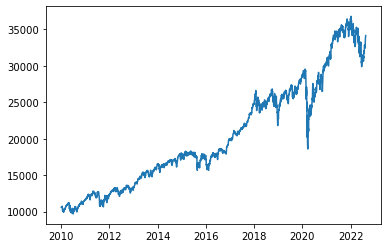

In [31]:
plt.plot(dji)
plt.show()

In [32]:
prophet_series = pd.DataFrame(list(zip(dji.index,dji['종가'])), columns=['ds', 'y'])
m.fit(prophet_series)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


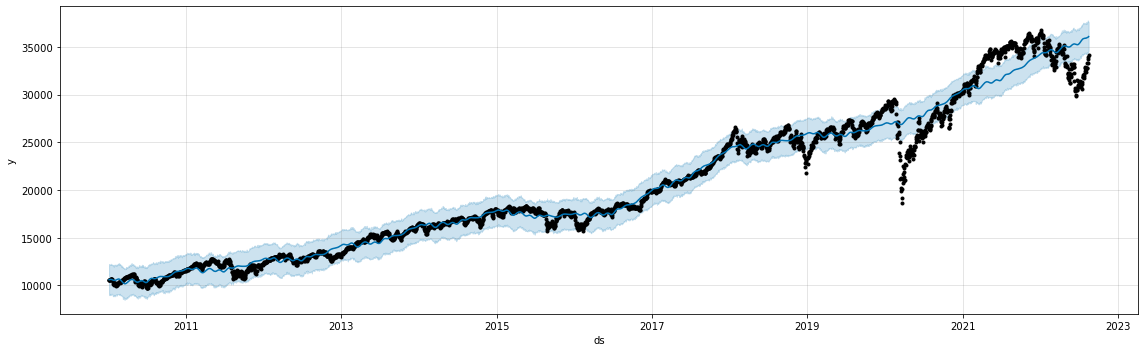

In [33]:
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


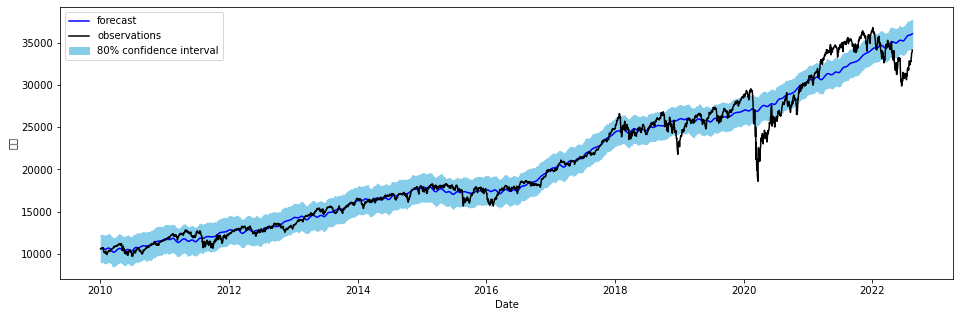

In [34]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),
                forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('종가')
plt.show()

In [35]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3902,2024-08-11
3903,2024-08-12
3904,2024-08-13
3905,2024-08-14


C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h_sl\.conda\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


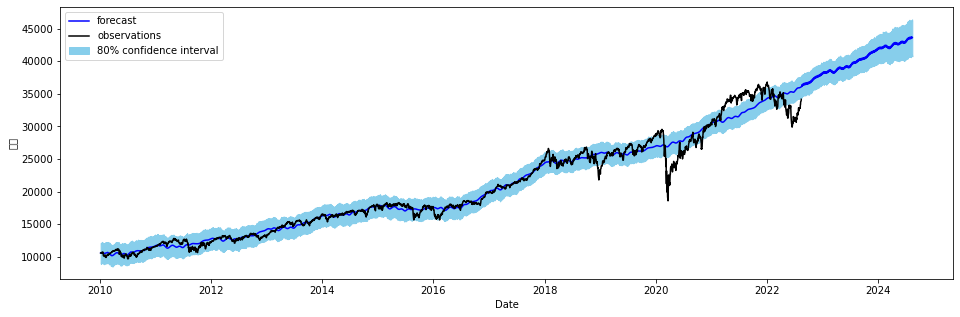

In [36]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('종가')
plt.show()

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,10264.248165,9008.728345,12103.671953,10264.248165,10264.248165,340.937859,340.937859,340.937859,-63.284092,-63.284092,-63.284092,404.221951,404.221951,404.221951,0.0,0.0,0.0,10605.186024
1,2010-01-05,10267.404155,9019.199859,12140.637838,10267.404155,10267.404155,358.870339,358.870339,358.870339,-50.514206,-50.514206,-50.514206,409.384545,409.384545,409.384545,0.0,0.0,0.0,10626.274493
2,2010-01-06,10270.560144,8919.685791,12097.768560,10270.560144,10270.560144,353.591958,353.591958,353.591958,-59.721906,-59.721906,-59.721906,413.313864,413.313864,413.313864,0.0,0.0,0.0,10624.152102
3,2010-01-07,10273.716134,9066.481341,12157.187444,10273.716134,10273.716134,353.889116,353.889116,353.889116,-62.015328,-62.015328,-62.015328,415.904444,415.904444,415.904444,0.0,0.0,0.0,10627.605250
4,2010-01-08,10276.872124,9023.761961,12040.956439,10276.872124,10276.872124,359.030935,359.030935,359.030935,-58.042453,-58.042453,-58.042453,417.073388,417.073388,417.073388,0.0,0.0,0.0,10635.903059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2024-08-11,43760.963694,40955.070408,46322.091350,41572.137691,45835.264050,-22.784092,-22.784092,-22.784092,146.788990,146.788990,146.788990,-169.573083,-169.573083,-169.573083,0.0,0.0,0.0,43738.179602
3903,2024-08-12,43771.279370,40913.376417,46198.219011,41579.093171,45854.385938,-227.373875,-227.373875,-227.373875,-63.284092,-63.284092,-63.284092,-164.089783,-164.089783,-164.089783,0.0,0.0,0.0,43543.905495
3904,2024-08-13,43781.595046,40923.473862,46363.957827,41586.048650,45873.507826,-207.840081,-207.840081,-207.840081,-50.514206,-50.514206,-50.514206,-157.325875,-157.325875,-157.325875,0.0,0.0,0.0,43573.754965
3905,2024-08-14,43791.910722,40919.966224,46408.698776,41593.457586,45892.431894,-209.147073,-209.147073,-209.147073,-59.721906,-59.721906,-59.721906,-149.425166,-149.425166,-149.425166,0.0,0.0,0.0,43582.763650


In [38]:
DJI = forecast[['ds','yhat']]

In [39]:
DJI = DJI[(DJI['ds'].dt.year >= 2022)]

In [40]:
DJI.rename(columns = {"ds":"Date","yhat" : 'DJI'}, inplace=True)
DJI

,Date,DJI
3021,2022-01-03,34285.422482
3022,2022-01-04,34314.779226
3023,2022-01-05,34321.049796
3024,2022-01-06,34333.001370
3025,2022-01-07,34349.880501
...,...,...
3902,2024-08-11,43738.179602
3903,2024-08-12,43543.905495
3904,2024-08-13,43573.754965
3905,2024-08-14,43582.763650


In [41]:
SP500.rename(columns = {"ds":"Date","yhat" : 'S&P500'}, inplace=True)
SP500

,Date,S&P500
3021,2022-01-03,4347.530461
3022,2022-01-04,4350.407910
3023,2022-01-05,4352.086196
3024,2022-01-06,4353.391705
3025,2022-01-07,4354.890117
...,...,...
3902,2024-08-11,5936.455120
3903,2024-08-12,5922.320409
3904,2024-08-13,5926.266377
3905,2024-08-14,5929.351743


In [42]:
SP500 = SP500.drop(SP500.columns[0], axis= 1)

In [43]:
prophet = pd.concat([DJI,SP500], axis = 1)

In [44]:
prophet.to_csv("prophet.csv", index=False)

In [45]:
prophet.head(30)

,Date,DJI,S&P500
3021,2022-01-03,34285.422482,4347.530461
3022,2022-01-04,34314.779226,4350.407910
3023,2022-01-05,34321.049796,4352.086196
3024,2022-01-06,34333.001370,4353.391705
3025,2022-01-07,34349.880501,4354.890117
3026,2022-01-10,34374.626062,4358.284236
3027,2022-01-11,34394.384564,4359.692457
3028,2022-01-12,34390.688081,4359.908923
3029,2022-01-13,34392.490687,4359.790805
3030,2022-01-14,34399.237470,4359.934413


# 금리 데이터 전처리 후 합치기

In [46]:
TN = pd.read_csv("미국금리데이터.csv")

In [47]:
TN

,Unnamed: 0,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,...,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01
0,"국고채(1년,평균)",3.29,3.12,2.83,2.67,2.73,2.92,3.14,3.13,2.99,...,1.07,1.18,1.34,1.32,1.42,1.48,1.59,2.00,2.05,2.60
1,"국고채(3년,평균)",4.29,4.19,3.94,3.77,3.70,3.75,3.88,3.73,3.48,...,1.52,1.84,1.95,1.80,2.06,2.29,2.37,2.94,3.02,3.48
2,"국고채(5년,평균)",4.84,4.76,4.47,4.44,4.41,4.41,4.45,4.27,3.91,...,1.79,2.15,2.17,1.98,2.28,2.50,2.60,3.14,3.23,3.65
3,"국고채(10년,평균)",5.35,5.30,4.92,4.91,4.95,4.93,4.91,4.68,4.28,...,2.06,2.40,2.36,2.19,2.49,2.69,2.78,3.22,3.23,3.64
4,"회사채수익율(AA-,평균)",5.40,5.32,5.02,4.69,4.48,4.65,4.81,4.68,4.41,...,1.95,2.30,2.49,2.41,2.63,2.87,3.03,3.63,3.78,4.23
5,콜금리(평균)1일물,2.00,2.00,2.01,2.00,2.01,2.00,2.21,2.27,2.27,...,0.77,0.74,0.80,1.01,1.19,1.22,1.24,1.30,1.51,1.75
6,"예금은행수신(신규취급액,저축성)",3.87,3.60,3.27,2.89,2.89,3.00,3.10,3.16,3.08,...,1.17,1.29,1.57,1.70,1.65,1.70,1.74,1.87,2.02,2.41
7,예금은행대출(신규취급액),5.94,5.84,5.69,5.49,5.40,5.32,5.39,5.51,5.45,...,2.96,3.07,3.23,3.25,3.45,3.51,3.50,3.57,3.68,3.90
8,CD(91일),2.88,2.88,2.83,2.51,2.45,2.45,2.58,2.63,2.66,...,0.98,1.08,1.17,1.27,1.39,1.50,1.50,1.64,1.77,1.99
9,"미T/N(10년,말)",3.58,3.61,3.83,3.65,3.29,2.93,2.91,2.47,2.51,...,1.49,1.55,1.44,1.51,1.78,1.83,2.34,2.93,2.84,3.01


In [48]:
TN = TN.drop(TN.index[0:9], axis = 0)

In [49]:
TN = TN.transpose()

In [50]:
TN = TN.rename(index= {"Unnamed: 0" : "Date"})

In [51]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Date to 2022-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   9       151 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [52]:
TN = TN.drop(TN.index[0], axis = 0)

In [53]:
TN.columns = ["미T/N"]
TN

,미T/N
2010-01-01,3.58
2010-02-01,3.61
2010-03-01,3.83
2010-04-01,3.65
2010-05-01,3.29
...,...
2022-02-01,1.83
2022-03-01,2.34
2022-04-01,2.93
2022-05-01,2.84


In [54]:
# TN.to_csv("TN.csv", index=True)

In [55]:
TN = TN.drop(TN.index[139:], axis = 0)

In [56]:
TN = TN.reset_index(drop=True)

In [57]:
gold_price = pd.read_csv("C:/Users/h_sl/OneDrive/광주인공지능사관학교/1차프로젝트/금 시세 데이터(미국)/gold_price_USD_date.csv")

In [58]:
gold_price

,Date,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,Fed
0,29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,14672.68,34935.47,4395.26,0.25
1,26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,14503.95,34502.51,4297.50,0.25
2,31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,13748.74,34529.45,4204.11,0.25
3,30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,13962.68,33874.85,4181.17,0.25
4,31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,13246.87,32981.55,3972.89,0.25
...,...,...,...,...,...,...,...,...,...,...,...
134,31-03-2021,1691.1,27.13,2220.52,19.40,24.532,62.36,2257.04,10136.63,1089.41,0.25
135,30-04-2021,1767.7,27.30,2266.45,18.61,25.915,61.70,2461.19,11008.61,1186.69,0.25
136,31-05-2021,1900.0,27.36,2268.97,16.76,28.014,65.16,2397.96,10856.63,1169.43,0.25
137,30-06-2021,1763.2,27.40,2310.55,15.83,26.194,71.35,2238.26,10325.26,1104.49,0.25


In [59]:
gold_price_TN = pd.concat([gold_price, TN], axis = 1)
gold_price_TN

,Date,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,Fed,미T/N
0,29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,14672.68,34935.47,4395.26,0.25,3.58
1,26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,14503.95,34502.51,4297.50,0.25,3.61
2,31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,13748.74,34529.45,4204.11,0.25,3.83
3,30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,13962.68,33874.85,4181.17,0.25,3.65
4,31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,13246.87,32981.55,3972.89,0.25,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...
134,31-03-2021,1691.1,27.13,2220.52,19.40,24.532,62.36,2257.04,10136.63,1089.41,0.25,1.74
135,30-04-2021,1767.7,27.30,2266.45,18.61,25.915,61.70,2461.19,11008.61,1186.69,0.25,1.63
136,31-05-2021,1900.0,27.36,2268.97,16.76,28.014,65.16,2397.96,10856.63,1169.43,0.25,1.59
137,30-06-2021,1763.2,27.40,2310.55,15.83,26.194,71.35,2238.26,10325.26,1104.49,0.25,1.47


In [60]:
gold_price_TN = gold_price_TN.drop(["Fed"], axis = 1)

In [61]:
gold_price_TN = gold_price_TN.rename(columns={"미T/N" : "T/N"})

In [62]:
gold_price_TN.to_csv("gold_price_TN.csv", index=False)

In [63]:
gold_price_TN

,Date,United States(USD),NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,T/N
0,29-01-2010,1078.5,25.05,602.04,24.62,16.183,78.40,14672.68,34935.47,4395.26,3.58
1,26-02-2010,1108.3,25.03,628.56,19.50,16.500,76.45,14503.95,34502.51,4297.50,3.61
2,31-03-2010,1115.5,24.97,678.64,17.59,17.512,81.29,13748.74,34529.45,4204.11,3.83
3,30-04-2010,1179.3,24.94,716.60,22.05,18.611,84.58,13962.68,33874.85,4181.17,3.65
4,31-05-2010,1207.5,25.09,661.61,32.07,18.411,74.12,13246.87,32981.55,3972.89,3.29
...,...,...,...,...,...,...,...,...,...,...,...
134,31-03-2021,1691.1,27.13,2220.52,19.40,24.532,62.36,2257.04,10136.63,1089.41,1.74
135,30-04-2021,1767.7,27.30,2266.45,18.61,25.915,61.70,2461.19,11008.61,1186.69,1.63
136,31-05-2021,1900.0,27.36,2268.97,16.76,28.014,65.16,2397.96,10856.63,1169.43,1.59
137,30-06-2021,1763.2,27.40,2310.55,15.83,26.194,71.35,2238.26,10325.26,1104.49,1.47


# 금리데이터 미래 값 예측하기

In [64]:
TN1 = gold_price_TN[["Date", "T/N"]]

In [65]:
TN1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    139 non-null    object
 1   T/N     139 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [66]:
TN1["T/N"] = TN1["T/N"].astype('float64')

C:\Users\h_sl\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
TN1['Date'] = pd.to_datetime(TN1['Date'])

C:\Users\h_sl\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
TN1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    139 non-null    datetime64[ns]
 1   T/N     139 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [69]:
TN1 = TN1.set_index("Date")

In [70]:
m = Prophet()

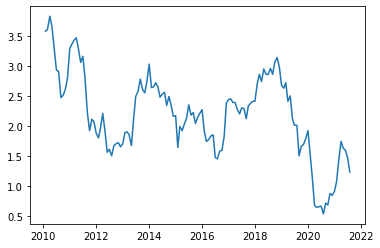

In [71]:
plt.plot(TN1)
plt.show()

In [72]:
prophet_series = pd.DataFrame(list(zip(TN1.index,TN1['T/N'])), columns=['ds', 'y'])
m.fit(prophet_series)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


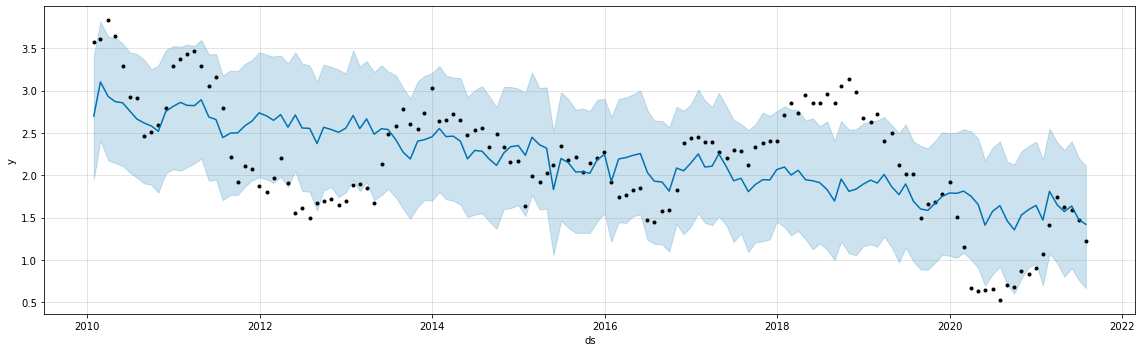

In [73]:
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

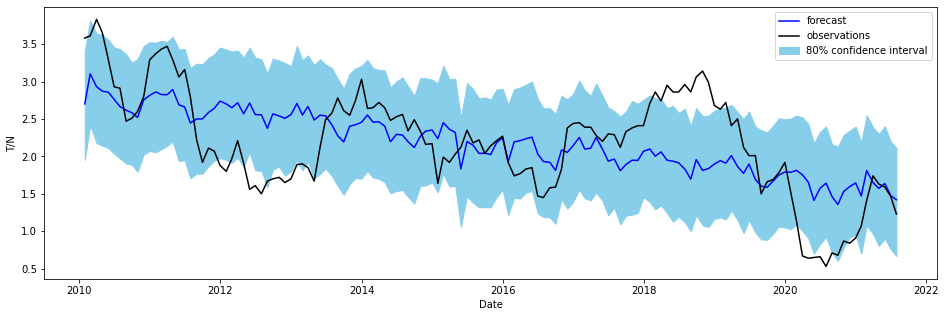

In [74]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),
                forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('T/N')
plt.show()

In [75]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2010-01-29
1,2010-02-26
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
864,2023-07-26
865,2023-07-27
866,2023-07-28
867,2023-07-29


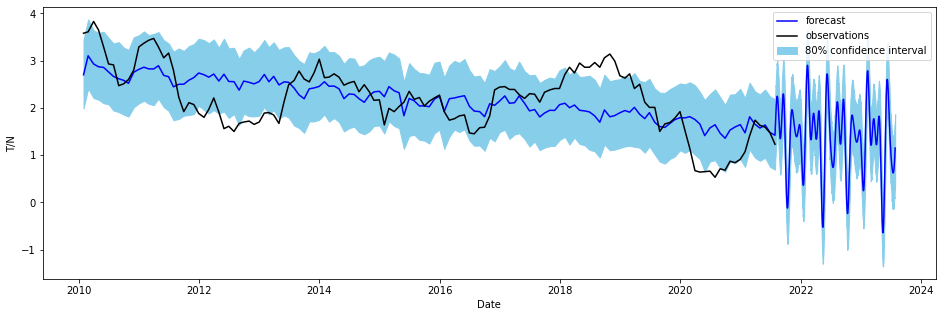

In [76]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(),forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('T/N')
plt.show()

In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-29,2.819147,1.989821,3.443218,2.819147,2.819147,-0.119229,-0.119229,-0.119229,-0.119229,-0.119229,-0.119229,0.0,0.0,0.0,2.699918
1,2010-02-26,2.809980,2.409895,3.874291,2.809980,2.809980,0.293064,0.293064,0.293064,0.293064,0.293064,0.293064,0.0,0.0,0.0,3.103044
2,2010-03-31,2.799175,2.206747,3.643531,2.799175,2.799175,0.130975,0.130975,0.130975,0.130975,0.130975,0.130975,0.0,0.0,0.0,2.930150
3,2010-04-30,2.789353,2.173377,3.590090,2.789353,2.789353,0.081236,0.081236,0.081236,0.081236,0.081236,0.081236,0.0,0.0,0.0,2.870590
4,2010-05-31,2.779204,2.096850,3.610364,2.779204,2.779204,0.077283,0.077283,0.077283,0.077283,0.077283,0.077283,0.0,0.0,0.0,2.856487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,2023-07-26,1.264402,0.092166,1.639400,1.263177,1.265669,-0.403032,-0.403032,-0.403032,-0.403032,-0.403032,-0.403032,0.0,0.0,0.0,0.861370
865,2023-07-27,1.264086,0.215277,1.660540,1.262859,1.265355,-0.339759,-0.339759,-0.339759,-0.339759,-0.339759,-0.339759,0.0,0.0,0.0,0.924327
866,2023-07-28,1.263770,0.271471,1.721009,1.262542,1.265046,-0.270037,-0.270037,-0.270037,-0.270037,-0.270037,-0.270037,0.0,0.0,0.0,0.993733
867,2023-07-29,1.263455,0.329897,1.765130,1.262224,1.264737,-0.194629,-0.194629,-0.194629,-0.194629,-0.194629,-0.194629,0.0,0.0,0.0,1.068826


In [78]:
TN2 = forecast[['ds','yhat']]

In [79]:
TN2

,ds,yhat
0,2010-01-29,2.699918
1,2010-02-26,3.103044
2,2010-03-31,2.930150
3,2010-04-30,2.870590
4,2010-05-31,2.856487
...,...,...
864,2023-07-26,0.861370
865,2023-07-27,0.924327
866,2023-07-28,0.993733
867,2023-07-29,1.068826


In [80]:
TN2 = TN2[(TN2['ds'].dt.year >= 2022)]

In [81]:
TN2.rename(columns = {"ds":"Date","yhat" : 'TN2'}, inplace=True)
TN2

C:\Users\h_sl\.conda\envs\test\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,TN2
293,2022-01-01,1.494497
294,2022-01-02,1.439753
295,2022-01-03,1.376961
296,2022-01-04,1.306781
297,2022-01-05,1.230115
...,...,...
864,2023-07-26,0.861370
865,2023-07-27,0.924327
866,2023-07-28,0.993733
867,2023-07-29,1.068826


In [82]:
TN2.iloc[225:300]

,Date,TN2
518,2022-08-14,2.121320
519,2022-08-15,2.101180
520,2022-08-16,2.069701
521,2022-08-17,2.027730
522,2022-08-18,1.976379
...,...,...
588,2022-10-23,0.413312
589,2022-10-24,0.534490
590,2022-10-25,0.658202
591,2022-10-26,0.782437


In [85]:
ee = pd.read_csv("data_forecast.csv")

In [86]:
ee

,Date,NYC_CPI,RUT,VIX,Silver,WTI,NDX,DJI,S&P500,TN
0,2022-08-17,27.116701,2243.775595,22.294036,20.317591,99.818871,15325.39448,36096.52704,4684.945851,2.25
1,2022-08-18,27.120365,2244.032444,22.183190,20.260996,100.011986,15340.26265,36114.99106,4688.209908,2.25
2,2022-08-19,27.126677,2244.356533,22.902694,20.203477,100.154258,15353.16563,36139.98492,4691.927255,2.25
3,2022-08-20,26.867031,2246.449835,22.847423,20.097197,104.438615,15418.87586,36365.88872,4712.983802,2.25
4,2022-08-21,27.109861,2247.601304,22.941220,19.456680,104.611137,15438.05433,36386.80534,4716.758857,2.25
...,...,...,...,...,...,...,...,...,...,...
725,2024-08-11,26.881988,2788.346399,20.279163,9.896198,158.652107,19720.52209,43738.17960,5936.455120,2.50
726,2024-08-12,26.912686,2790.328858,20.424958,10.464064,154.346536,19699.64594,43543.90550,5922.320409,2.50
727,2024-08-13,26.915964,2791.483927,20.312915,10.399755,154.636302,19716.49912,43573.75497,5926.266377,2.50
728,2024-08-14,26.924106,2794.745798,20.383456,10.304101,154.615017,19738.07922,43582.76365,5929.351743,2.50


In [ ]:
mylist = []
for i in range(row[0][0], row[0][1]):
    mylist.append(i)